In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

sns.set()

from IPython.display import display
from tools import make_track,make_ER, ols_regression, ols_regression_ER, lasso_regression_ER
from hc_graph import hc_stock

<IPython.core.display.Javascript object>

Open console to check js libs were loaded in page


### Financial data loads and cleaning

In [4]:
# BNP Data
#bnp = pd.read_csv(r'financial_data/bnp_data.csv', parse_dates =True, sep=";", header= [3], index_col=0)
#bnp_wanted_ticker = ["US_USDLIBOR3M","USD_EUR"]
#bnp

In [5]:
# yahoo_prices
#yahoo = pd.read_csv(r"financial_data/yahoo_prices.csv", index_col=0, parse_dates=True, dayfirst=True)

# MSCI
#msci = pd.read_csv(r'financial_data/msci_data.csv', index_col=0, parse_dates=True, sep=";")

# USD Rates
usd = pd.read_csv(r"financial_data/USD_rates.csv", index_col=0, parse_dates=True)["3M"]

# HFRX
hfrx_all = pd.read_csv(r"financial_data/hfrx_daily_index_data.csv", index_col=0, parse_dates=True)
hfrx = make_ER(hfrx_all[['HFRXEMN']],usd)

# BNP
bnp_all = pd.read_csv(r"financial_data/bnp_data.csv", index_col=0, parse_dates=True, dayfirst=True)

bnp = bnp_all[['BNPIFEU','BNPIFUS','BNPIFJP','BNPIFCN','BNPIFFR','BNPIFGE','BNPIFGB','BNPIFCH',
          'BNPIFKR','BNPIFUSC','BNPIFBR','BNPIFAU','BNPIFHK','BNPIFTW',
          'BNPIFSG','BNPIFIT','BNPIFSP','BNPIFSW','BNPIFNE','BNPIFRU','BNPIFEM','BNPIFJT',
          'BPFXEUR1','BPFXGBP1','BPFXCHF1','BPFXJPY1','BPFXAUD1','BPFXNZD1','BPFXNOK1',
          'BPFXSEK1','BPFXCAD1','BPFXCZK1','BPFXPLN1','BPFXHUF1','BPFXTRY1','BPFXZAR1',
          'BPFXSGD1','BPFXMXN1','BPFXINR1','BPFXKRW1','BPFXPHP1','BPFXTWD1','BPFXBRL1','BPFXCLP1','BPFXCOP1']]

bnp2 = bnp_all[['BNPIFEU','BNPIFUS','BNPIFUSC','BNPIFEM','BNPIFCH','BNPIFGB','BNPIFJP','BPFXEUR1','BPFXGBP1','BPFXJPY1']]

In [6]:
prices = bnp.copy()
prices = prices.join(hfrx,how="outer")

prices2 = bnp2.copy()
prices2 = prices2.join(hfrx,how="outer")

In [7]:
prices.head()

,BNPIFEU,BNPIFUS,BNPIFJP,BNPIFCN,BNPIFFR,BNPIFGE,BNPIFGB,BNPIFCH,BNPIFKR,BNPIFUSC,...,BPFXSGD1,BPFXMXN1,BPFXINR1,BPFXKRW1,BPFXPHP1,BPFXTWD1,BPFXBRL1,BPFXCLP1,BPFXCOP1,HFRXEMN
2003-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2003-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00248
2003-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998289
2003-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996762
2003-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995995


In [8]:
#starts = prices.apply(lambda x:x.first_valid_index())
#starts.T

In [9]:
prices = prices.ffill().dropna()
prices2 = prices2.ffill().dropna()

returns = prices.resample('7D').first().pct_change().dropna()
returns2 = prices2.resample('7D').first().pct_change().dropna()
returns.head()

,BNPIFEU,BNPIFUS,BNPIFJP,BNPIFCN,BNPIFFR,BNPIFGE,BNPIFGB,BNPIFCH,BNPIFKR,BNPIFUSC,...,BPFXSGD1,BPFXMXN1,BPFXINR1,BPFXKRW1,BPFXPHP1,BPFXTWD1,BPFXBRL1,BPFXCLP1,BPFXCOP1,HFRXEMN
2007-01-10,-0.023483,-0.001466,-0.016763,-0.107756,-0.019571,-0.018204,-0.026017,-0.007456,-0.042665,-0.011683,...,-0.004049,-0.023780,-0.003297,-0.014743,0.002214,-0.013550,-0.007802,-0.009324,-0.013639,-0.004011
2007-01-17,0.012666,0.010691,0.018700,0.030176,0.008724,0.017329,0.005805,0.026870,0.014758,0.011742,...,0.000452,0.008291,0.006908,0.002688,0.000086,-0.003435,0.011181,0.001140,0.012233,0.004375
2007-01-24,0.008973,0.005061,0.014536,0.005827,0.014211,0.008010,0.016816,0.004151,0.008261,0.005709,...,0.000720,-0.000731,0.001982,-0.000561,-0.000432,-0.002004,0.004712,0.006829,-0.012819,0.006737
2007-01-31,-0.001924,-0.001982,-0.007496,-0.044726,-0.006004,0.004237,-0.017975,-0.000295,-0.020868,0.007186,...,-0.000713,-0.007705,0.001769,-0.004882,-0.000182,-0.002535,0.002567,-0.009974,0.000107,0.007599
2007-02-07,0.016186,0.007990,-0.005236,0.033903,0.015707,0.017753,0.027216,0.014780,0.048193,0.018974,...,0.002150,0.010142,0.002698,0.010440,0.010433,-0.000791,0.020403,-0.007595,0.009399,0.006753


In [10]:
hrfx_returns = returns[["HFRXEMN"]]
bch_returns = returns.drop("HFRXEMN", axis=1)

hrfx_returns2 = returns2[["HFRXEMN"]]
bch_returns2 = returns2.drop("HFRXEMN", axis=1)

In [11]:
#Params

size = 104
freq = 4
bounds = (-np.inf,np.inf)
total_weight = np.nan
lambda_ = 5*(10**(-3))

In [12]:
df_weight = ols_regression_ER(hrfx_returns, bch_returns, size, freq, boundaries=bounds, weight_sum=total_weight)
prices_for_track = prices.loc[df_weight.index[0]:].drop("HFRXEMN", axis=1)
replication = make_track(prices_for_track, df_weight)

df_weight2 = ols_regression_ER(hrfx_returns2, bch_returns2, size, freq, boundaries=bounds, weight_sum=total_weight)
prices_for_track2 = prices2.loc[df_weight2.index[0]:].drop("HFRXEMN", axis=1)
replication2 = make_track(prices_for_track2, df_weight2)

df_weight_lasso = lasso_regression_ER(hrfx_returns, bch_returns, size, freq,lambda_= lambda_,
                                    boundaries=bounds, weight_sum=total_weight)
replication_lasso = make_track(prices_for_track, df_weight_lasso)

df_res = prices.loc[replication.index][["HFRXEMN"]]
df_res["OLS All"] = replication
df_res["OLS small universe"] = replication2
df_res["OLS All Lasso"] = replication_lasso

df_res = df_res / df_res.iloc[0]

df_res.head()

,HFRXEMN,OLS All,OLS small universe,OLS All Lasso
2009-01-07,1.000000,1.000000,1.000000,1.000000
2009-01-08,1.001871,0.999719,0.999855,0.999773
2009-01-09,1.006621,1.000690,1.000069,1.000649
2009-01-12,1.004569,1.000548,0.999956,1.000472
2009-01-13,1.003619,0.999624,0.999620,0.999662


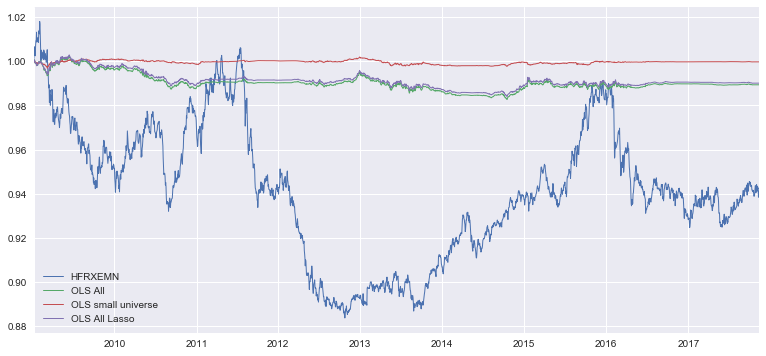

In [16]:
df_res.plot(figsize=(13,6), linewidth=1)

In [17]:
g = hc_stock(df_res)
g.plot_with_table_1()

In [19]:
v = np.array([[1,2],[3,4]])
v

array([[1, 2],
       [3, 4]])

In [20]:
np.square(v)

array([[ 1,  4],
       [ 9, 16]])

In [21]:
v**2

array([[ 1,  4],
       [ 9, 16]])